> 

# Project: Investigate TMDB Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



> I have decided to investigate the TMDB Movie Data. This data set provides a detailed information of all Hollywood movies that have been released since 1966 to 2015.Some of the major attributes that have been provided for analysis include budget, revenue, cast, director, genre, production company, release date and user rating.
>
> In this report, I have tried to compare the revenue/budget/profit with various other attributes
> Following are the questions that I try to explore from this data set:<br/><br/>

> 1) Which genres are most revenue genrating from year to year? <br/> 
> 2) How has the overall budget and revenue varied?<br/>
> 3) Which Production companies are the most profitable for the last 15 years?<br/>
> 4) Which movies are the most profitable for the last 15 years?<br/>
> 5) Number of movies associated to directors which has grossed more than $500 million in revenue
<br/><br/>


In [3]:
# Import the packages that is intended for analysis
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> In this section, I have loaded the data from tmdb-movies.csv file. <br/>
> My first step of analysis involved checking for null values and replacing null values across some of the columns intended for analysis with "Missing Data"


In [5]:
# Loading data rom csv
filename='C:/Users/Vijin/Udacity/Part 3/Project/tmdb-movies.csv'
movies_df=pd.read_csv(filename)

#Printing top 5 rows
movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
#Checking number of rows and columns in the dataframe
movies_df.shape

(10866, 21)

In [7]:
#Checking for total number of null values across each column
movies_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
#Filling null values in Cast column with "Misssing Cast" and confirming if there is any null values
movies_df['cast'].fillna('Missing Cast', inplace='true')
movies_df['cast'].isnull().any()

False

In [9]:
#Filling null values in Director column with "Misssing Director" and confirming if there is any null values
movies_df['director'].fillna('Missing Director', inplace='true')
movies_df['director'].isnull().any()

False

In [10]:
#Filling null values in Genre column with "Misssing Genre" and confirming if there is any null values
movies_df['genres'].fillna('Missing Genres', inplace='true')
movies_df['genres'].isnull().any()

False

In [11]:
#Filling null values in Production Companies column with "Misssing Production Companies" and confirming if there is any null values
movies_df['production_companies'].fillna('Missing Production Companies', inplace='true')
movies_df['production_companies'].isnull().any()

False

In [12]:
#Checking for null values across each columns again
movies_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       0
homepage                7930
director                   0
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


### Data Cleaning

> Create new dataframe by deleting those rows where revenue or budget is 0 since we won't be able to do a comparison of revenue vs budget for those movies

In [15]:
# Create new dataframe by deleting those rows where revenue or budget is 0 since 
# we wont be able to do a comparison of revenue vs budget analysis for these movies

movies_rev_bud_df=movies_df[((movies_df.revenue!=0) & (movies_df.budget!=0)) ]
movies_rev_bud_df.shape


(3855, 21)

In [16]:
#Adding a new column Profit in the dataframe movies_rev_bud_df

profit=pd.Series(movies_rev_bud_df['revenue'] - movies_rev_bud_df['budget'] )
movies_rev_bud_df.loc[:,'profit']= profit

In [17]:
#Verifying the rows and columns of the new dataframe

movies_rev_bud_df.shape

(3855, 22)

In [18]:
#A function to convert the columns with delimiter | to an array so as to perform analysis

def split_names(names):
    full_name=names.split('|')
    return full_name

genres_array=movies_df['genres'].apply(split_names)
cast_array=movies_df['cast'].apply(split_names)
production_array=movies_df['production_companies'].apply(split_names)

#Creating a new column genre_comma in dataframe
movies_df['genre_comma']= pd.Series(genres_array,index=movies_df.index)

#Creating a new column cast_comma in dataframe
movies_df['cast_comma']= pd.Series(cast_array,index=movies_df.index)

#Creating a new column production_companies_comma in dataframe
movies_df['production_companies_comma']=pd.Series(production_array,index=movies_df.index)

#Verifying the new columns are added in the dataframe
movies_df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre_comma,cast_comma,production_companies_comma
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,"[Action, Adventure, Science Fiction, Thriller]","[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...","[Universal Studios, Amblin Entertainment, Lege..."
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,"[Action, Adventure, Science Fiction, Thriller]","[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...","[Village Roadshow Pictures, Kennedy Miller Pro..."
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,"[Adventure, Science Fiction, Thriller]","[Shailene Woodley, Theo James, Kate Winslet, A...","[Summit Entertainment, Mandeville Films, Red W..."
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,"[Action, Adventure, Science Fiction, Fantasy]","[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...","[Lucasfilm, Truenorth Productions, Bad Robot]"
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,"[Action, Crime, Thriller]","[Vin Diesel, Paul Walker, Jason Statham, Miche...","[Universal Pictures, Original Film, Media Righ..."


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Most revenue genrating genres year on year (2011-2015 comparison)

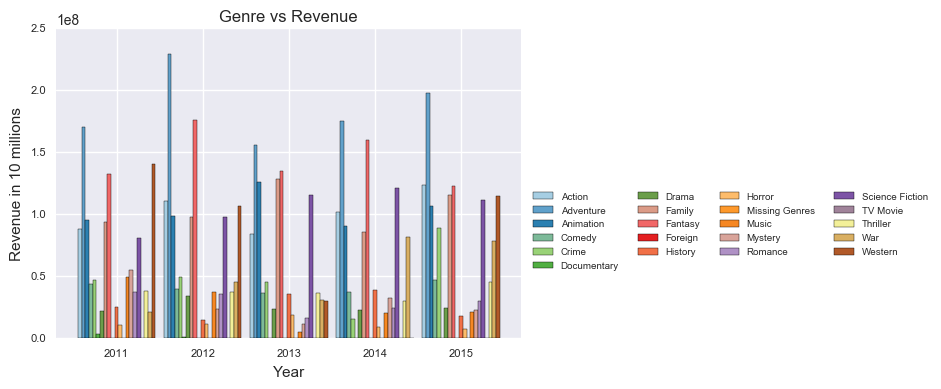

In [19]:
# Creating 3 empty lists
revenue_list=[]
genre_list=[]
year_list=[]

#A function to define the genres and its associated revenue and release year (Assumption: All the genres associated to a 
#movie are given the same revenue weightage)
def create_list(genres):
    #print genres
    for x in genres['genre_comma']:
        genre_list.append(x)
        revenue_list.append(genres['revenue'])
        year_list.append(genres['release_year'])
        
    return None

movies_df.apply(create_list, axis='columns')  

#Creating a new dataframe with columns revenue, genre and year
new_genre_df=pd.DataFrame({'revenue':revenue_list,
                            'genre':genre_list,
                            'year': year_list}
                            )
                            
#Creating a new dataframe which copies all data after 2010
genre_filter_df=new_genre_df[new_genre_df['year']>2010]

#Grouping by year and genre and calculating the mean of revenue
genre_plot=genre_filter_df.groupby(['year','genre']).mean()['revenue']

#Reshaped dataframe with new innermost level of column labels
genre_plot_bar=genre_plot.unstack('genre')

#Plotting bar chart
ax=genre_plot_bar.plot.bar(label="bar_graph",fontsize=8,width=0.9,colormap="Paired")

#Formatting legends
ax.legend(prop={'size':7},loc='upper center', bbox_to_anchor=(1.45, 0.5),shadow=True, ncol=4)

#Formatting labels
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(0)
plt.xlabel('Year')
plt.ylabel('Revenue in 10 millions')
plt.title('Genre vs Revenue')





### Research Question 2: Budget vs Revenue comparison (Decade on Decade comparison)

(10866, 26)
(3855, 26)


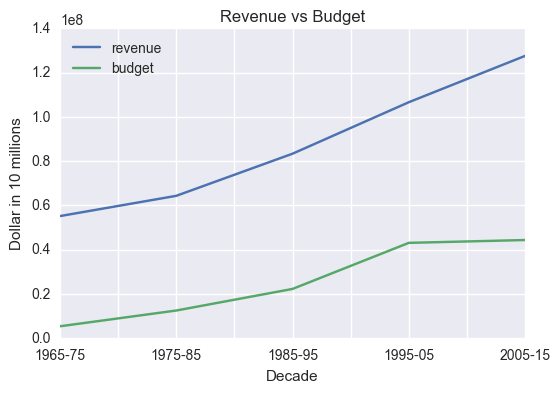

In [21]:
# Revenue and Budget comparison by decade

bins=[1965,1975,1985,1995,2005,2015]
group_names=['1965-75','1975-85','1985-95','1995-05','2005-15']

#Grouping each movie in to various bins
categories=pd.cut(movies_df['release_year'], bins, labels=group_names)
movies_df['categories']=pd.cut(movies_df['release_year'], bins, labels=group_names)
movies_df['yearsBinned']=pd.cut(movies_df['release_year'], bins)
print movies_df.shape

#Creating a new dataframe by eliminating all movies with revenue or budget=0
movies_df_cleanup=movies_df[((movies_df.revenue!=0) & (movies_df.budget!=0))]
print movies_df_cleanup.shape

#Grouping by categories and calculating mean of revenue and budget
rev_bud_plot=movies_df_cleanup.groupby('categories')['revenue','budget'].mean()
rev_bud_plot

#Creating a line plot
ax1=rev_bud_plot.plot()

#Formating labels in the plot
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(0)  
plt.xlabel('Decade')
plt.ylabel('Dollar in 10 millions')
plt.title('Revenue vs Budget')

                            


### Research Question 3: 3 top Production Companies tied to profitable business every year since 2000

In [23]:
#Creating 3 empty lists
prod_list=[]
year_list=[]
profit_list=[]

#A function to define the production companies, profit and release year (Assumption: All the production companies associated to a 
# movie are given the same weightage)
def create_prod_list(prod_companies):
    for x in prod_companies['production_companies_comma']:
        prod_list.append(x)
        profit_list.append(prod_companies['revenue']-prod_companies['budget'])
        year_list.append(prod_companies['release_year'])
        
    return None

movies_df_cleanup.apply(create_prod_list, axis='columns')  

#Creating a new dataframe with profit, production companies and year
prod_genre_df=pd.DataFrame({'profit':profit_list,
                            'productionCompanies':prod_list,
                            'year': year_list}
                            )
                            
#Creating a newdataframe by filtering data after 2000
prod_filter_df=prod_genre_df[prod_genre_df['year']>2000]

#Grouping data by year and productionCompanies and calculating the mean of profit (also eliminates creating an index
# by setting group_keys=false)
prod_plot=prod_filter_df.groupby(['year','productionCompanies'],group_keys=False).mean()

#Sorting profit in descending order and considering only the top 3 production companies for each year
prod_plot2= prod_plot['profit'].groupby(level=0, group_keys=False).apply(lambda x: x.sort_values(ascending=False).head(3))
print prod_plot2

year  productionCompanies                  
2001  Heyday Films                              851475550
      WingNut Films                             778368364
      The Saul Zaentz Company                   778368364
2002  WingNut Films                             847287400
      The Saul Zaentz Company                   847287400
      1492 Pictures                             776688482
2003  WingNut Films                            1024888979
      Disney Enterprises                        770625978
      Pixar Animation Studios                   770625978
2004  1492 Pictures                             659804554
      P of A Productions Limited                659804554
      Heyday Films                              659804554
2005  Heyday Films                              745921036
      Patalex IV Productions Limited            745921036
      Lucasfilm                                 737000000
2006  Second Mate Productions                   865659812
      Skylark Productions   

### Research Question 4: 3 movies which are the most profitable every year since 2000

In [335]:
#Creating a new dataframe by filtering data after 2000
movies_df_profit=movies_df[movies_df['release_year']>2000]

#Grouping dat by release year, original title and calculating mean of revenue and budget 
movies_plot=movies_df_profit.groupby(['release_year','original_title'])['revenue','budget'].mean()

#Calculating profit for each movie
movies_plot['profit']=movies_plot['revenue']-movies_plot['budget']

#Sorting profit in descending order and considering only the top 3 movies for each year
movies_plot2= movies_plot['profit'].groupby(level=0, group_keys=False).apply(lambda x: x.sort_values(ascending=False).head(3))
movies_plot2

release_year  original_title                                                
2001          Harry Potter and the Philosopher's Stone                           851475550
              The Lord of the Rings: The Fellowship of the Ring                  778368364
              Monsters, Inc.                                                     447816256
2002          The Lord of the Rings: The Two Towers                              847287400
              Harry Potter and the Chamber of Secrets                            776688482
              Spider-Man                                                         682708551
2003          The Lord of the Rings: The Return of the King                     1024888979
              Finding Nemo                                                       770625978
              The Matrix Reloaded                                                588599701
2004          Shrek 2                                                            769838758
             

### Research Question 5: Number of movies associated to directors which have revenue more than $500 million

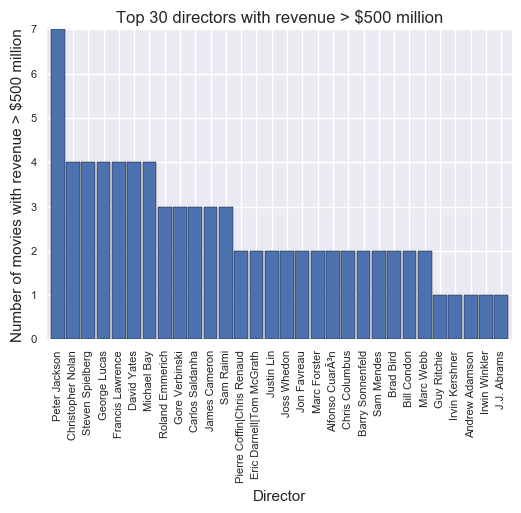

In [27]:
#Creating a new dataframe by filtering thse movies with revenue greater than $500 million
movies_df_rev=movies_df[movies_df['revenue']>500000000]

#Grouping top 30 data by director and calculating mean revenue count
movies_directors=movies_df_rev.groupby(['director'])['revenue'].count().sort_values(ascending=False).head(30)

#Plotting a bar chart
ax2=movies_directors.plot.bar(fontsize=8,width=0.9)

#Formating axis labels
plt.xlabel('Director')
plt.ylabel('Number of movies with revenue > $500 million')
plt.title('Top 30 directors with revenue > $500 million')

<a id='conclusions'></a>
## Conclusions

> Findings:

> 1) From the analysis, it could be found that movies which are in Adventure, Action or Fantasy tend to have a greater success (more revenue) rate than compared to other genres. 

> 2) It could also be found that the budget as well as revenue of movies have steadily increased over the past 50 years. 

> 3) Production companies like Heyday Films, Wingnut films and Lucas Films tend to be profitable and are seen often in the top production companies list for the past 15 years

> 4) The Harry Potter movie franchise seems to have a greate success as they are always present in the top 3 revenue genrated movies whenever they were released.Majority of the top movies are either fantasy, action or adventure based theme movies.

>5) There are 25 directors who have a credit of generating atleast 2 movies with revenue greater than $500 million.
